In [124]:
# Common imports
import pandas as pd
import numpy as np
from textblob import TextBlob
import datetime as dt

#TensorFlow required imports
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

#Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

In [125]:
#function to plot a series as well as the predicted and value to be predicted (if known)
def plot_series(series, y=None, y_pred=None):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(range(series.shape[0], series.shape[0]+y.shape[0]), y, "bx-", markersize=10, label="Actual")
    if y_pred is not None:
        plt.plot(range(series.shape[0], series.shape[0]+y_pred.shape[0]), y_pred, "ro-", label="Prediction")
    plt.grid(True)
    plt.legend()
    plt.show()

In [126]:
#function to plot actual values vs. predicted values
def plot_actual_pred( actual, prediction ):
    plt.plot(actual, ".-", alpha=.6, label="Actual")
    plt.plot(prediction, ".-", alpha=.6, label="Prediction")
    plt.grid(True)
    plt.legend()
    plt.show()

In [127]:
#function provided that plots the learning curve for neural networks
def plot_learning_curve( history ):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    ymin, ymax = [], []
    for x in history.history.keys():
        ymax.append( max(history.history[x]))
        ymin.append( min(history.history[x]))
    plt.gca().set_ylim(min(ymin), max(ymax))
    plt.xlabel("EPOCHS")
    plt.show()

In [128]:
#this is the formula
def fix_bins(x):
        if x == '23.30-23.59':
            x = 47
        elif x == '23.00-23.29':
            x = 46
        elif x == '22.30-22.59':
            x = 45       
        elif x == '22.00-22.29':
            x = 44
        elif x == '21.30-21.59':
            x = 43
        elif x == '21.00-21.29':
            x = 42
        elif x == '20.30-20.59':
            x = 41
        elif x == '20.00-20.29':
            x = 40
        elif x == '19.30-19.59':
            x = 39
        elif x == '19.00-19.29':
            x = 38
        elif x == '18.30-18.59':
            x = 37
        elif x == '18.00-18.29':
            x = 36
        elif x == '17.30-17.59':
            x = 35
        elif x == '17.00-17.29':
            x = 34
        elif x == '16.30-16.59':
            x = 33
        elif x == '16.00-16.29':
            x = 32
        elif x == '15.30-15.59':
            x = 31
        elif x == '15.00-15.29':
            x = 30
        elif x == '14.30-14.59':
            x = 29
        elif x == '14.00-14.29':
            x = 28
        elif x == '13.30-13.59':
            x = 27
        elif x == '13.00-13.29':
                x = 26
        elif x == '12.30-12.59':
                x = 25
        elif x == '12.00-12.29':
                x = 24
        elif x == '11.30-11.59':
                x = 23
        elif x == '11.00-11.29':
                x = 22
        elif x == '10.30-10.59':
                x = 21
        elif x == '10.00-10.29':
                x = 20
        elif x == '09.30-09.59':
                x = 19
        elif x == '09.00-09.29':
                x = 18
        elif x == '08.30-08.59':
                x = 17
        elif x == '08.00-08.29':
                x = 16
        elif x == '07.30-07.59':
                x = 15
        elif x == '07.00-07.29':
                x = 14
        elif x == '06.30-06.59':
                x = 13
        elif x == '06.00-06.29':
                x = 12
        elif x == '05.30-05.59':
                x = 11
        elif x == '05.00-05.29':
                x = 10
        elif x == '04.30-04.59':
                x = 9
        elif x == '04.00-04.29':
                x = 8
        elif x == '03.30-03.59':
                x = 7
        elif x == '03.00-03.29':
                x = 6
        elif x == '02.30-02.59':
                x = 5
        elif x == '02.00-02.29':
                x = 4
        elif x == '01.30-01.59':
                x = 3
        elif x == '01.00-01.29':
                x = 2
        elif x == '00.30-00.59':
                x = 1
        elif x == '00.00-00:29':
            x = 0
        
        return x

In [129]:
data=pd.read_excel('/content/datafinal.xlsx')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13314 entries, 0 to 13313
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   time_x                             13311 non-null  datetime64[ns]
 1   open                               13311 non-null  float64       
 2   high                               13311 non-null  float64       
 3   low                                13311 non-null  float64       
 4   close                              13311 non-null  float64       
 5   volume                             13311 non-null  float64       
 6   week_day                           13311 non-null  float64       
 7   Time                               13311 non-null  object        
 8   NYSE:GME: (United States)          13311 non-null  float64       
 9   r/WallStreetBets: (United States)  13311 non-null  float64       
 10  market_cap                        

In [131]:
data.dropna(inplace=True)

In [132]:
data.head()

,time_x,open,high,low,close,volume,week_day,Time,NYSE:GME: (United States),r/WallStreetBets: (United States),market_cap,date,30minInterval,title,score,id,url,comms_num,created,body,timestamp,TitlePolarity,TitleSubjectivity,BodyPolarity,BodySubjectivity,time_y,marketpost
0,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,20:00:00,100.0,56.0,98210708.12,2021-01-28,20.00-20.29,They're trying to say this was all done by 'Na...,972.0,l6tfyh,https://i.redd.it/37okz5nhu1e61.png,274.0,1.611858e+09,Not Disclosed,2021-01-28 20:21:00,0.00,0.00,0.000000,0.000000,20:21:46,0.0
1,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,20:00:00,100.0,56.0,98210708.12,2021-01-28,20.00-20.29,My brokerage wants to force close my GME calls,560.0,l6te9s,https://www.reddit.com/r/wallstreetbets/commen...,215.0,1.611858e+09,My brokerage called me and asked me to close m...,2021-01-28 20:18:00,0.20,0.10,0.030202,0.420536,20:18:32,0.0
2,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,20:00:00,100.0,56.0,98210708.12,2021-01-28,20.00-20.29,"Guys i just want to say , i never been more pr...",1452.0,l6tdfc,https://www.reddit.com/r/wallstreetbets/commen...,189.0,1.611858e+09,Not Disclosed,2021-01-28 20:17:00,0.65,0.75,0.000000,0.000000,20:17:02,0.0
3,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,20:00:00,100.0,56.0,98210708.12,2021-01-28,20.00-20.29,Iacta alea est,133.0,l6td49,https://www.reddit.com/r/wallstreetbets/commen...,30.0,1.611858e+09,I was the lucky one in my family. In 2008 I w...,2021-01-28 20:16:00,0.00,0.00,0.097564,0.484167,20:16:28,0.0
4,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,20:00:00,100.0,56.0,98210708.12,2021-01-28,20.00-20.29,Rocketship to Mars!,215.0,l6tbye,https://www.reddit.com/r/wallstreetbets/commen...,90.0,1.611858e+09,# Hold/Buy until GME marketcap is higher than ...,2021-01-28 20:14:00,0.00,0.00,1.000000,0.500000,20:14:23,0.0


In [133]:
data['date']= pd.to_datetime(data['date'],infer_datetime_format=True)
data['date']=data['date'].apply(lambda x: x.toordinal())

In [134]:
data.drop(['id','url','created','body','title','Time','timestamp','time_y'],axis=1, inplace=True)

In [135]:
#call the formula on the 30minIntervalColumn using:

data['30minInterval']= data['30minInterval'].apply(lambda x: fix_bins(x))

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13308 entries, 0 to 13313
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   time_x                             13308 non-null  datetime64[ns]
 1   open                               13308 non-null  float64       
 2   high                               13308 non-null  float64       
 3   low                                13308 non-null  float64       
 4   close                              13308 non-null  float64       
 5   volume                             13308 non-null  float64       
 6   week_day                           13308 non-null  float64       
 7   NYSE:GME: (United States)          13308 non-null  float64       
 8   r/WallStreetBets: (United States)  13308 non-null  float64       
 9   market_cap                         13308 non-null  float64       
 10  date                              

In [137]:
#levearge the known temp to predict the next temp 
#shift the temp column by one
data['Target'] = data.close.shift(1)

#need to delete the first row in the dataframe because it has not prevTemp
data = data[1:].copy()

#look now at your dataset
data.head()

,time_x,open,high,low,close,volume,week_day,NYSE:GME: (United States),r/WallStreetBets: (United States),market_cap,date,30minInterval,score,comms_num,TitlePolarity,TitleSubjectivity,BodyPolarity,BodySubjectivity,marketpost,Target
1,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,100.0,56.0,98210708.12,737818,40,560.0,215.0,0.20,0.10,0.030202,0.420536,0.0,311.99
2,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,100.0,56.0,98210708.12,737818,40,1452.0,189.0,0.65,0.75,0.000000,0.000000,0.0,311.99
3,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,100.0,56.0,98210708.12,737818,40,133.0,30.0,0.00,0.00,0.097564,0.484167,0.0,311.99
4,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,100.0,56.0,98210708.12,737818,40,215.0,90.0,0.00,0.00,1.000000,0.500000,0.0,311.99
5,2021-01-28 20:00:00,313.89,327.0,305.99,311.99,314788.0,5.0,100.0,56.0,98210708.12,737818,40,331.0,94.0,0.00,0.00,-0.037500,0.496528,0.0,311.99


In [138]:
data.set_index('time_x', inplace=True)

In [139]:
data.sort_index(ascending=True,inplace=True)

In [140]:
data=data.drop('close',axis=1)

In [141]:
#Set a value for the number of predictions the model should make
NUM_PREDICTIONS = 3

#For demonstrations purposes, keep the predictions aside so you can evaluate the results
toPredict = data[-NUM_PREDICTIONS:].copy()

#remove future predictions from dataset
data = data[:-NUM_PREDICTIONS].copy() #two separate dataframe

toPredict.shape, data.shape

((3, 18), (13304, 18))

In [142]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Target'],axis=1), data.Target, test_size=0.20, random_state=42, shuffle = False)

#let's see what we have
X_train.shape, X_test.shape, y_train.shape

((10643, 17), (2661, 17), (10643,))

In [143]:
#no categorical attributes for this data set (nice to have in case data changes)
cat_attribs = []

#set the numerical attributes
num_attribs = list( X_train.drop(cat_attribs,axis=1) )

#define pipeline for numeric attributes (this code is just a definition)
#each numeric attribute will be imputated using the Median strategy
#each numeric attribute will be scaled 
num_pipeline = Pipeline( [
 ('std_scaler', MinMaxScaler()),   
])

#define the pipeline process for the data set
full_pipeline = ColumnTransformer( [
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse=False), cat_attribs)      #because no categorical attributes, not used 
])

In [144]:
#create an array of prepared data based on the training data set
X_train = full_pipeline.fit_transform( X_train )
X_test = full_pipeline.transform(X_test)
X_train.shape, X_test.shape

((10643, 17), (2661, 17))

In [145]:
#scale the target data
yscaler = MinMaxScaler()
y_train = yscaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = yscaler.transform(np.array(y_test).reshape(-1,1))

Establish Baseline

In [146]:
#predcition is based on last observed value
pred= yscaler.inverse_transform(y_test[1:,])
actual= yscaler.inverse_transform(y_test[:-1,])

#calculate the Mean Absolute Error between the prediction and the actual
np.mean(keras.losses.mean_absolute_error(pred,actual))

1.83258037593985

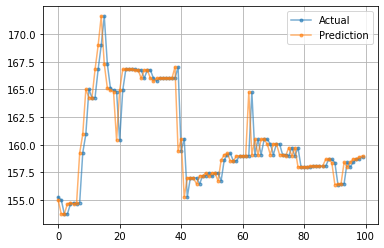

In [147]:
#plot the last 48 instances in the series to see the "predicted" shift in temperatures 
plot_actual_pred (actual[-100:], pred[-100:])

Linear Regression

In [148]:
#build the model and fit our data to the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
#test the model out on the Test data
predictions = lin_reg.predict(X_test)
pred = yscaler.inverse_transform(predictions)
actual = yscaler.inverse_transform(y_test)

np.mean(keras.losses.mean_absolute_error(pred[-5:],actual[-5:]))

4.982637593170091

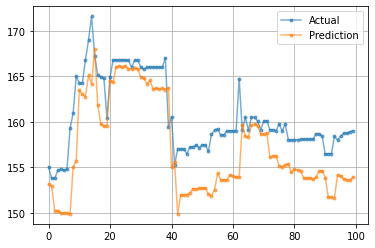

In [150]:
plot_actual_pred (actual[-100:], pred[-100:])

RNN

In [151]:
X_train_series = X_train.reshape(X_train.shape[0], -1, X_train.shape[1])
X_test_series  = X_test.reshape( X_test.shape[0],  -1, X_test.shape[1])
X_train_series.shape, X_test_series.shape

((10643, 1, 17), (2661, 1, 17))

In [184]:
#starting by setting random seeds and restarting keras blackend session
np.random.seed(42)
tf.random.set_seed(42)

#resets the Keras global state - helps avoid clutter from old models and layers, especially when memory is limited
keras.backend.clear_session()

In [185]:
#17 original inputs and 1 output so in between 12-34 neurons per layer
model = keras.models.Sequential([
    keras.layers.GRU(30, return_sequences=True, input_shape=[None,X_train_series.shape[2]]), 
    keras.layers.GRU(20, return_sequences=True, input_shape=[None,X_train_series.shape[2]]), 
    keras.layers.GRU(10, activation="relu"), 
    keras.layers.Dense(1)
])

In [186]:
#compile the model
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(lr=.00001))

In [187]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, mode='min')

In [188]:
#fit the model
history = model.fit(X_train_series, y_train, epochs=100,
                    validation_split=.2, shuffle=False, batch_size=3, callbacks=[early_stopping])

Epoch 1/100
2838/2838 [==============================] - 14s 4ms/step - loss: 0.4708 - val_loss: 0.2287
Epoch 2/100
2838/2838 [==============================] - 10s 3ms/step - loss: 0.4060 - val_loss: 0.2268
Epoch 3/100
2838/2838 [==============================] - 10s 3ms/step - loss: 0.3687 - val_loss: 0.2226
Epoch 4/100
2838/2838 [==============================] - 10s 4ms/step - loss: 0.3359 - val_loss: 0.2107
Epoch 5/100
2838/2838 [==============================] - 10s 4ms/step - loss: 0.2869 - val_loss: 0.1922
Epoch 6/100
2838/2838 [==============================] - 10s 4ms/step - loss: 0.2258 - val_loss: 0.1691
Epoch 7/100
2838/2838 [==============================] - 10s 4ms/step - loss: 0.1518 - val_loss: 0.1398
Epoch 8/100
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0837 - val_loss: 0.1157
Epoch 9/100
2838/2838 [==============================] - 10s 3ms/step - loss: 0.0601 - val_loss: 0.1006
Epoch 10/100
2838/2838 [==============================] - 10s 4m

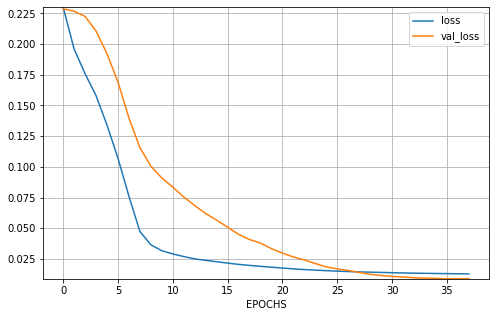

In [189]:
#plot the learning curve of the model; overfitting
plot_learning_curve(history)
plt.show()

In [191]:
#predict the test data set
y_pred = model.predict(X_test_series)

#scale predicted and actuals
pred = yscaler.inverse_transform( y_pred )
actual = yscaler.inverse_transform(y_test)

#calculate the Mean Absolute Error using the scaled values
np.mean(keras.losses.mean_absolute_error(pred[-5:],actual[-5:]))

1.003118896484375

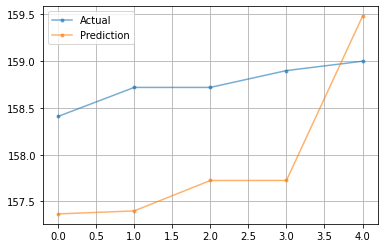

In [192]:
#plot the actuals vs. the predictions
plot_actual_pred ( actual[-5:], pred[-5:,0] )

Predict Future Values

In [193]:
#Prepare future predictions
#remember from above some instances were kept and stored into the dataframe called toPredict

#prepare the data for the model
X_future = full_pipeline.transform( toPredict.drop(['Target'], axis=1) ) #take out solution
X_future = X_future.reshape(X_future.shape[0], -1, X_future.shape[1])

#preserve the actual values
y_future = np.array( toPredict.Target )

In [194]:
#Predict using the model
y_prediction = model.predict( X_future )

#scale the y values
y_prediction = yscaler.inverse_transform( y_prediction )

In [195]:
#calculate the Mean Absolute Error using the scaled values
#NOTE: if NUM_PREDICTIONS is > 1, the ,0 is needed to compare the 1st value in the prediction
np.mean(keras.losses.mean_absolute_error( y_prediction[-5:], y_future[-5:]) ) 

2.485114542643231

In [196]:
y_future, y_prediction

(array([159. , 164.9, 159. ]), array([[158.4015 ],
        [158.40157],
        [158.64159]], dtype=float32))

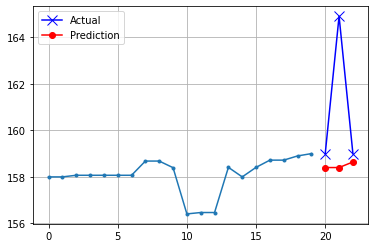

In [197]:
#plot the actual values as well as future known actuals vs. future predictions
#NOTE: if NUM_PREDICTIONS is > 1, the ,0 is needed to only plot the 1st value in the prediction
plot_series(actual[-20:], y_future, y_prediction[-20:,0]) 